# **Context:**

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

# **Problem Statement:**

As a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not

# **Objective:**

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer has a higher probability of getting a promotion
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the company

# **Data Description:**

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [ ]:
!pip install imbalanced-learn

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading dataset

In [ ]:
data=pd.read_csv('employee_promotion.csv')

### Overview dataset

In [ ]:
data.head()

### Understand the shape of the dataset

In [405]:
data.shape

(54808, 13)

- There are 54808 rows and 13 columns

### Check data types and number of non-null values for each column

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


- There are missing values in education,previous_year_ratings and avg_trainig_score
- Most dataset types are int,float or object 

### Check sum of missing values per columns 

In [407]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

- There are missing values in education, previous_year_rating and avg_training_score
- Missing values will be taken care by deleting the column or imputing avg of each column if needed 

### Number of unique values in each column

In [408]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

- Since the employee_id values are all unique given with all unique id, can drop the column and will not add value to the model

### Drop unnecessory column

In [409]:
new_d= data.drop(['employee_id'], axis=1)
new_d

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,NaN,m,sourcing,1,29,1.000,2,0,NaN,0


### Summary of the dataset

In [410]:
new_d.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


**Observations:**

- The 'length_of_service' column's 50% quartile value is 5 and there are no huge value gape between 25%~75% quartile. However, the max value is 37 which means there might be outliers in the data 
- There might be outliers in 'age' column: Avg value is 33 and max value is 60 which is 2 times higher than the mean
- Can conclude that the 'awards_won' and 'is_promoted' columns are categorical data since the min and max value are 0 and 1, and the avg value is 0

## EDA
### Univariate analysis

In [411]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(new_d, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=new_d, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=new_d, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="gray"
    ) if bins else sns.histplot(
        data=new_d, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        new_d[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        new_d[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on age

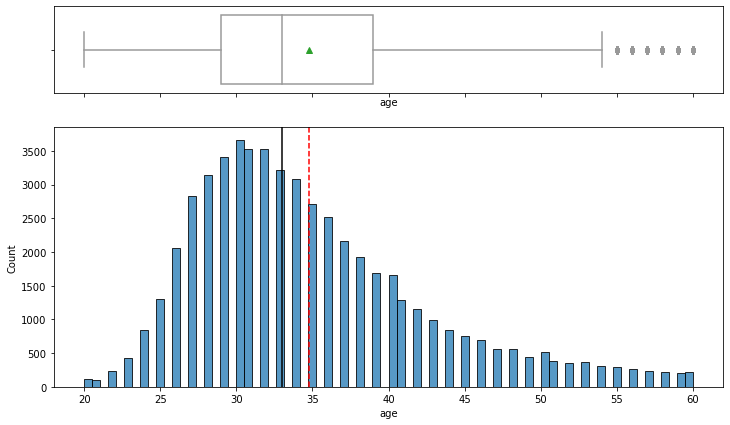

In [412]:
histogram_boxplot(new_d, 'age')

- The distribution of age is a little left skewed
- There are 6 potential outliers
- The mean and median are in a close range between 33 to 35

#### Observations on no_of_trainings

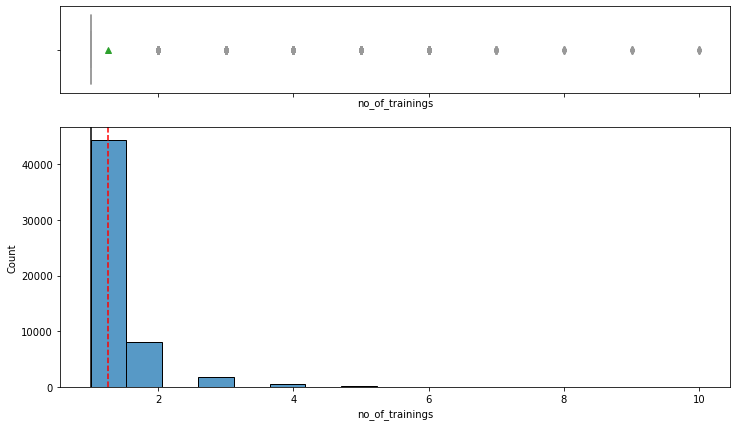

In [413]:
histogram_boxplot(new_d, 'no_of_trainings')

- The mean and median is close to 0 to 1
- There are 9 potential outliers 
- There are few 4's and 5's and most of themd are 0 or 1 
- It is left skewed 

#### Observation on previous_year_rating

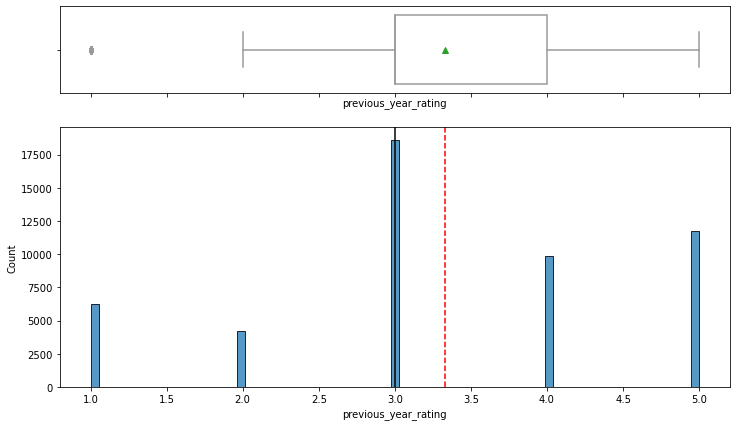

In [414]:
histogram_boxplot(new_d, 'previous_year_rating')

- There is one potential outlier in this distribution
- The value of mean and median are not the same yet close

#### Observation on length_of_service

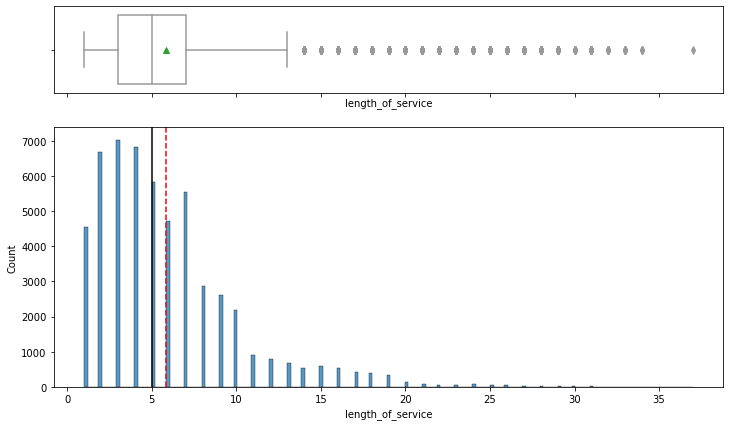

In [415]:
histogram_boxplot(new_d,'length_of_service')

- length_of_service has a left-skewed distribution and 3 is the highest count among all observations
- Distribution is not symmetric but mean and median are approx equal with a value approx. 5 
- There are 22 potential outliers in this column

#### Observation on avg_training_score

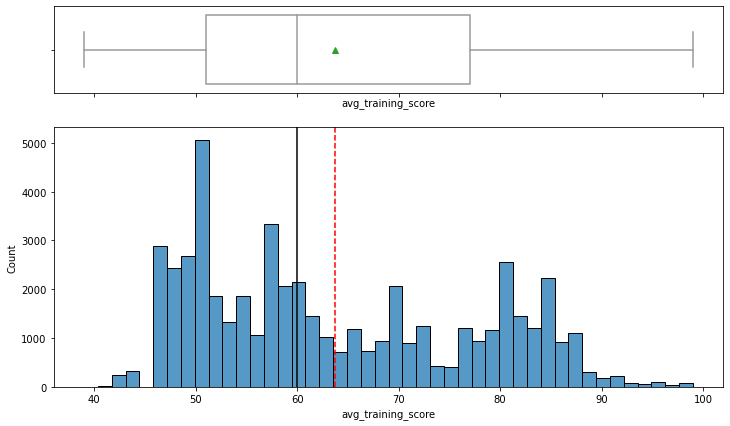

In [416]:
histogram_boxplot(new_d, 'avg_training_score')

- avg_training_score isnt evenly distributed. Distribution is not symmetric
- The highest count among all observations is approx between 50 to 52
- There are no outliers in this distribution

In [417]:
# function to create labeled barplots


def labeled_barplot(new_d, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(new_d[feature])  # length of the column
    count = new_d[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=new_d,
        x=feature,
        palette="Paired",
        order=new_d[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observation on department

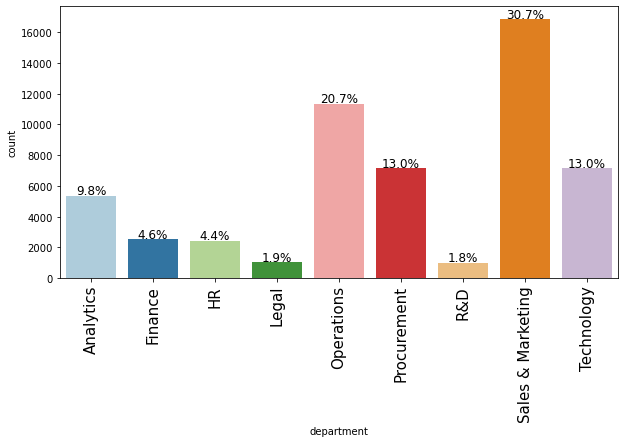

In [418]:
labeled_barplot(new_d,'department',perc=True)

- Most of employees are from Sales and Marketing 
- The least percentage of employees are from legal and R&D department

#### Observation on region

In [419]:
labeled_barplot(new_d,'region',perc=True)

KeyError: 'region'

- Most employees are from region_2. It shows a distinctly hight percentage compare to other regions
- Followed by region_2, region_22 and region_7 are second and third highest regions
- Other than top 3 regions(region_2, region_22,region_7),regions cover between min of 0.1% to max of 5.1%  

#### Observation on education

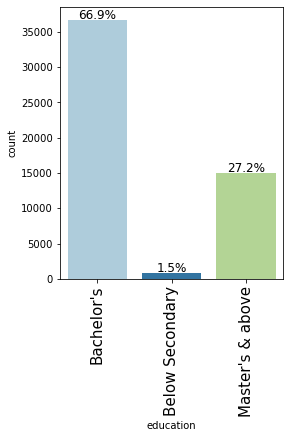

In [420]:
labeled_barplot(new_d,'education',perc=True)

- More than 2/3 of employes have bachelor's degree
- Some of them acheived master's or higher education and few has below secondary education

#### Observation on gender

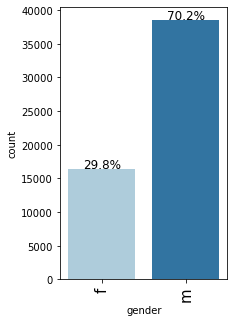

In [421]:
labeled_barplot(new_d,'gender',perc=True)

- There are more of males than females
- The difference between male and female's ratio is approx 40% 

#### Observation on recruitment_channel

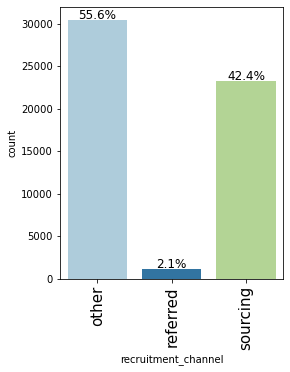

In [422]:
labeled_barplot(new_d,'recruitment_channel',perc=True)

- More than half of the employees are recruited by 'other'(other than recruitment or referrals)
- Followed by 'other', almost about half of employees got recruited by 'sourcing'(going through regular recruitment process)
- Few of employees are recruited by getting referral by other employees

### Bivariate Analysis 

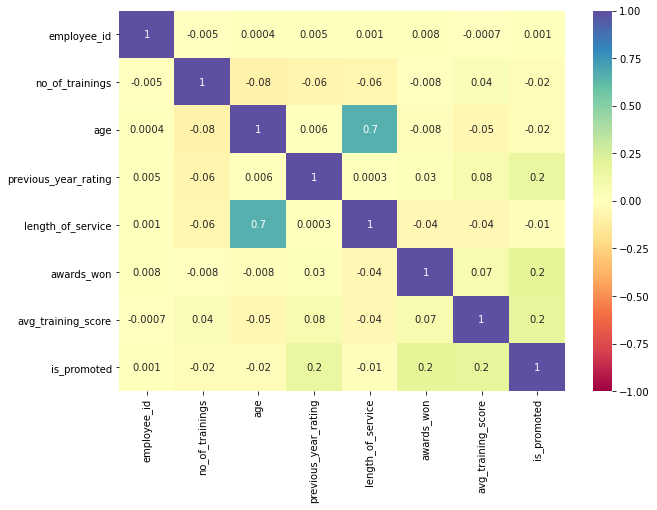

In [423]:
plt.figure(figsize=(10,7))
sns.heatmap(new_d.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

- age vs length_of_service are highly correlated/ has strong positive correlation 
- Other than that, shows low and few negative correlations 

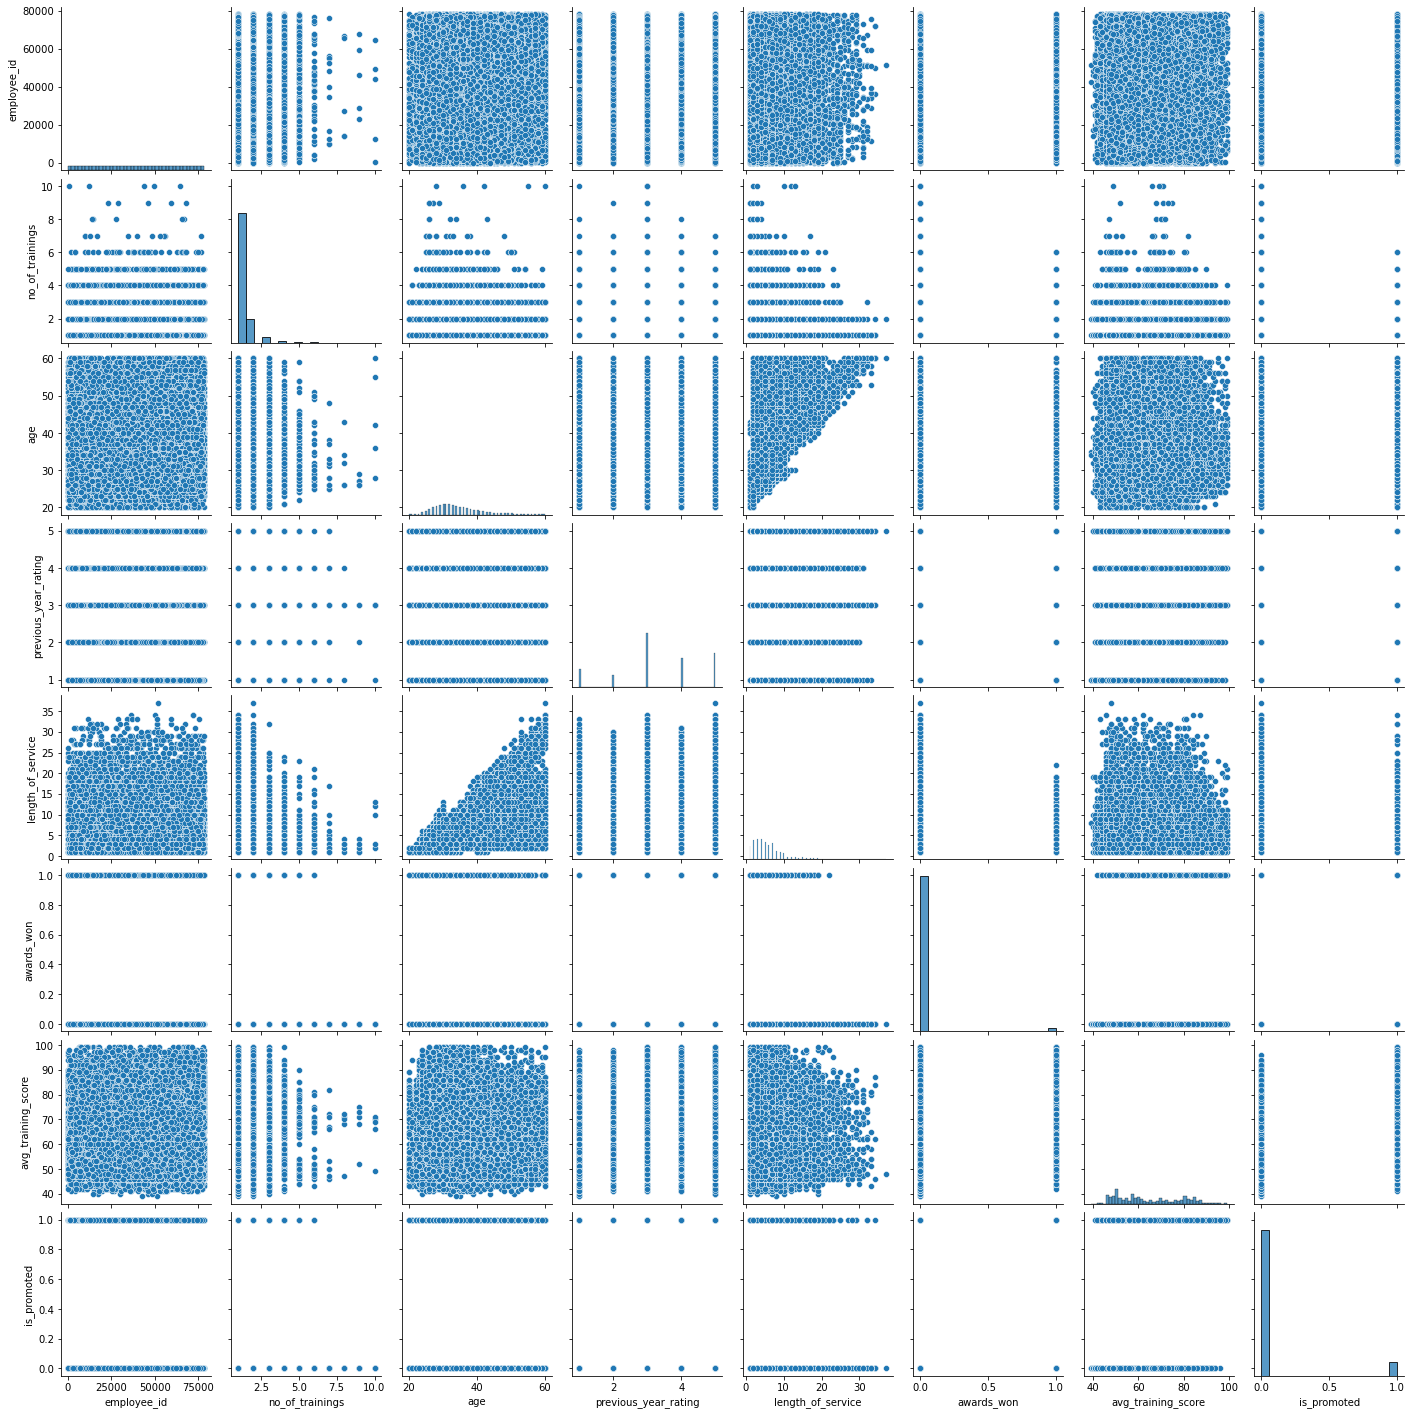

In [424]:
sns.pairplot(new_d)
plt.show()

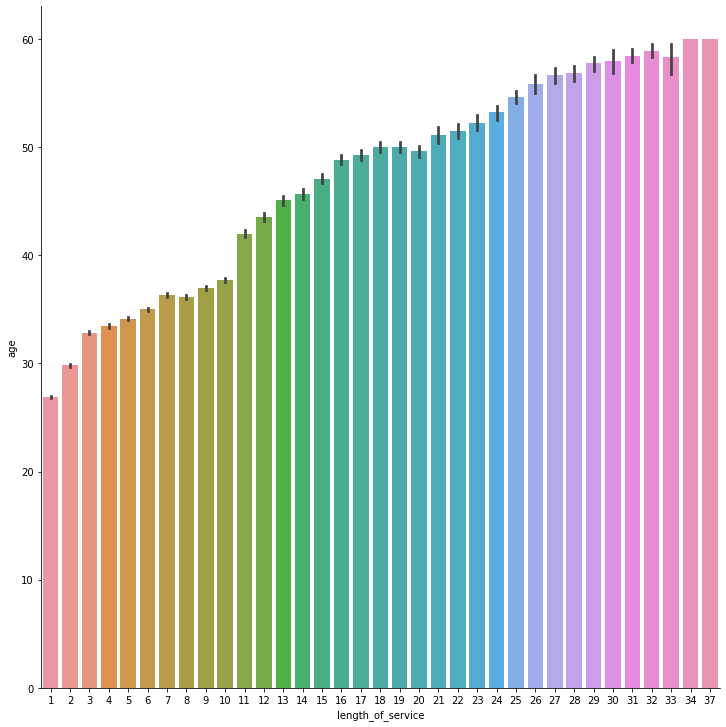

In [425]:
sns.catplot(x="length_of_service", y='age', kind='bar', data=new_d, size=10);

- As the employee gets aged, the year of service for the company increases
- The max age of 60, the highest length_of_service is 37 years 
- The youngest employee is approx about end of 20s who worked at the company for a year

### Data Pre-processing

#### Missing value treatment 

In [426]:
#object data type: education
new_d['education'].fillna(value= "Bachelor's", inplace=True)
new_d

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,1,29,1.000,2,0,NaN,0


In [427]:
new_d.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
avg_training_score      2560
employee_id                0
department                 0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
awards_won                 0
is_promoted                0
dtype: int64

- Replaced missing values in education are all replaced with "Bachelor's" since most of employees had approx 67% of bachelor degree
- The missing values for previous_year_rating and avg_training_score will be treated when fitting and transforming the train and test data

### Finding percentage of Outlier

In [428]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

employee_id             0.000
no_of_trainings        19.030
age                     2.618
previous_year_rating   11.354
length_of_service       6.366
awards_won              2.317
avg_training_score      0.000
is_promoted             8.517
dtype: float64

### Split the data into train and test data to prevent from the leakage

In [430]:
imputer = SimpleImputer(strategy="most_frequent")

In [431]:
X = new_d.drop(['is_promoted'], axis=1)
y = new_d['is_promoted']

# Splitting data into training, validation and test set:

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 11) (10962, 11) (10962, 11)


### Fit and transform the train and test data

In [432]:
reqd_col_for_impute = ["previous_year_rating", "avg_training_score"] #two columns that have missing values

In [433]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the val data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [434]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

employee_id             0
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
employee_id             0
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
employee_id             0
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


- Rest of missing values are treated. No missing values

### Count data types for X_train, X_val, X_test

In [435]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Sales & Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: department, dtype: int64
******************************
Bachelor's          23562
Master's & above     8840
Below Secondary       482
Name: education, dtype: int64
******************************
m    22989
f     9895
Name: gender, dtype: int64
******************************
other       18260
sourcing    13942
referred      682
Name: recruitment_channel, dtype: int64
******************************


In [436]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Sales & Marketing    3454
Operations           2315
Procurement          1392
Technology           1364
Analytics            1072
Finance               485
HR                    456
Legal                 227
R&D                   197
Name: department, dtype: int64
******************************
Bachelor's          7744
Master's & above    3053
Below Secondary      165
Name: education, dtype: int64
******************************
m    7809
f    3153
Name: gender, dtype: int64
******************************
other       6073
sourcing    4666
referred     223
Name: recruitment_channel, dtype: int64
******************************


In [437]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Sales & Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: department, dtype: int64
******************************
Bachelor's          23562
Master's & above     8840
Below Secondary       482
Name: education, dtype: int64
******************************
m    22989
f     9895
Name: gender, dtype: int64
******************************
other       18260
sourcing    13942
referred      682
Name: recruitment_channel, dtype: int64
******************************


### Encoding categorical data

In [438]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 20) (10962, 20) (10962, 20)


- After encoding, there are 20 columns

In [439]:
X_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
24986,64061,2,34,3.000,4,0,85.000,0,0,0,0,0,0,0,0,0,1,1,0,1
42259,77335,1,35,3.000,10,0,65.000,0,0,0,0,1,0,0,0,0,1,1,0,1
51748,65766,2,28,4.000,3,0,50.000,0,0,0,0,0,0,1,0,0,0,1,0,0
48031,33912,1,38,1.000,9,0,51.000,0,0,0,0,0,0,1,0,0,0,1,0,0
36827,74596,1,39,5.000,12,0,88.000,0,0,0,0,0,0,0,0,0,0,1,0,0


### Building the model

In [440]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [441]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Original Models

In [442]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 0.0
Bagging: 32.32142857142858
Random forest: 29.107142857142854
GBM: 30.642857142857142
Adaboost: 16.25
Xgboost: 32.464285714285715
dtree: 38.17857142857143

Validation Performance:

Logistic regression: 0.0
Bagging: 0.33190578158458245
Random forest: 0.2955032119914347
GBM: 0.30513918629550324
Adaboost: 0.16167023554603854
Xgboost: 0.32012847965738755
dtree: 0.39828693790149894


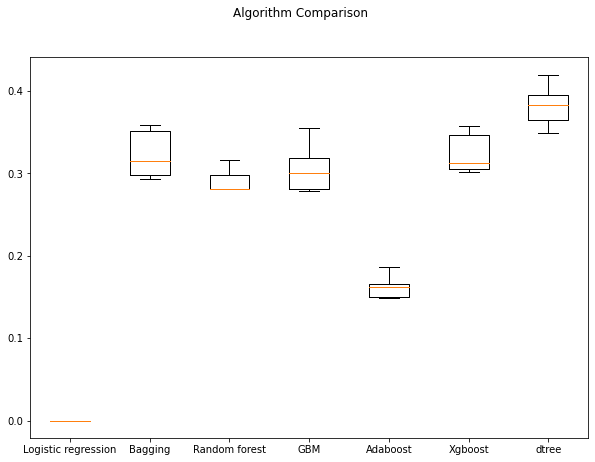

In [443]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

#### Performance comparison:

- Decision tree has the best performance followed by bagging
- There are no outliers in each performances 
- Unlike other algorithm, logistic regression shows '0' performance for cross-validation and validation
- All model shows low performances below .40 

### Models with Oversampled

In [447]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 20)
After Oversampling, the shape of train_y: (60168,) 



In [448]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 67.42116806017702
Bagging: 92.28161167472302
Random forest: 92.42788053529185
GBM: 89.94483162069173
Adaboost: 88.45566992811149
Xgboost: 93.04947429534758
dtree: 93.01622353685832

Validation Performance:

Logistic regression: 0.5995717344753747
Bagging: 0.3501070663811563
Random forest: 0.3511777301927195
GBM: 0.39400428265524623
Adaboost: 0.30513918629550324
Xgboost: 0.3490364025695932
dtree: 0.39828693790149894


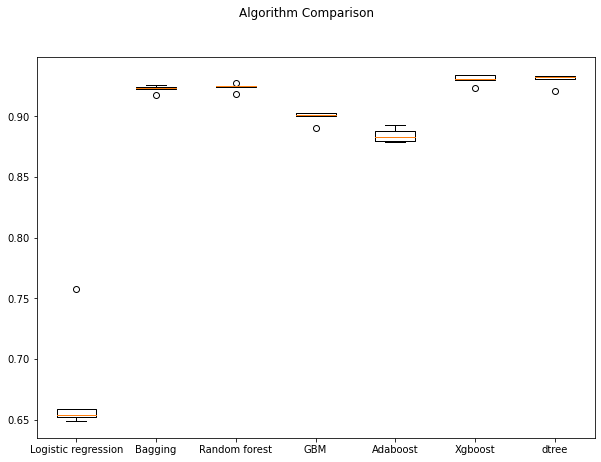

In [449]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

#### Performance comparison:
- Logistic regression shows the best performance followed by gradient boosting
- Except adaboost, performance of all models has 1 or 2 outlier(s)

### Models with Undersampled

In [450]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [451]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 20)
After Under Sampling, the shape of train_y: (5600,) 



In [296]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 65.57142857142857
Bagging: 58.464285714285715
Random forest: 64.25
GBM: 60.21428571428572
Adaboost: 65.67857142857143
Xgboost: 63.21428571428571
dtree: 64.75000000000001

Validation Performance:

Logistic regression: 0.6777301927194861
Bagging: 0.6006423982869379
Random forest: 0.645610278372591
GBM: 0.5920770877944326
Adaboost: 0.6595289079229122
Xgboost: 0.6381156316916489
dtree: 0.6605995717344754


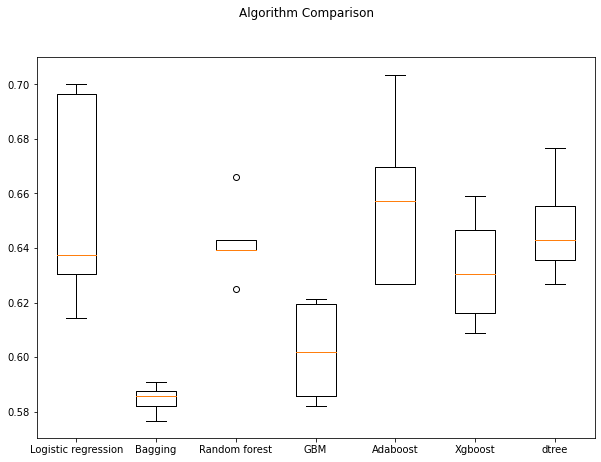

In [297]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

#### Performance comparison:

- Logistic regression has the best performance followed by decision tree validation performance
- Performance of random forest has 2 outliers and other models are onsistent with no outliers
- For undersampling the data, all the models' performances turned out higher than performances with oversampled data.

# Which top 3 models should be hypertuned?
Adaboost,Gradient boost, XGBoost models have consistent and good performance for all 3 datasets. Will tune these 3 models using undersampled data and original data

## 1. Adaboost

### Tuning with Undersampled data

In [461]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.6571428571428571:
Wall time: 21.2 s


In [462]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [463]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.778,0.679,0.847,0.754


In [464]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.804,0.618,0.244,0.349


### Tuning with Original data

In [465]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.3289285714285714:
Wall time: 1min 35s


In [466]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [467]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.942,0.329,0.985,0.493


In [468]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.938,0.299,0.918,0.451


## 2. Gradient Boosting

### Tuning with Undersampled data

In [469]:
%%time 

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.6439285714285715:
Wall time: 23.3 s


In [470]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [471]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.773,0.694,0.825,0.754


In [472]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.781,0.621,0.220,0.325


### Tuning with Original data

In [473]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.3857142857142857:
Wall time: 1min 45s


In [474]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [475]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.793,0.694,0.246,0.364


In [476]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.781,0.621,0.220,0.325


## 3. XGBoost

### Tuning with Undersampled data

In [454]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9910714285714286:
Wall time: 57.1 s


In [455]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [456]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    tuned_xgb1, X_train_un, y_train_un
)
xgb1_train

,Accuracy,Recall,Precision,F1
0,0.542,1.000,0.522,0.686


In [457]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb1_val

,Accuracy,Recall,Precision,F1
0,0.156,0.998,0.092,0.168


### Tuning with Original data

In [477]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 50, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.5546428571428572:
Wall time: 5min


In [478]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [479]:
# Checking model's performance on training set
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

,Accuracy,Recall,Precision,F1
0,0.855,0.579,0.312,0.405


In [480]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

,Accuracy,Recall,Precision,F1
0,0.850,0.562,0.298,0.389


## Model Performance Comparison

Metric on interest on the test set is expected to be > 0.70

In [481]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb1_train.T,
        xgb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.542,0.855,0.773,0.793,0.778,0.942
Recall,1.000,0.579,0.694,0.694,0.679,0.329
Precision,0.522,0.312,0.825,0.246,0.847,0.985
F1,0.686,0.405,0.754,0.364,0.754,0.493


In [482]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb1_val.T, xgb2_val.T, gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.156,0.850,0.781,0.781,0.804,0.938
Recall,0.998,0.562,0.621,0.621,0.618,0.299
Precision,0.092,0.298,0.220,0.220,0.244,0.918
F1,0.168,0.389,0.325,0.325,0.349,0.451


- The models have given a bit far off performances but Adaboost trained with original data seems the most generalised performance out of all 

In [483]:
#check the performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.941,0.344,0.909,0.499


- The model has given generalised performance on the test set without considering recall score and f1 score. 

feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances(indices), color="violet", align="center")
plt.yticks(range(len(indices)), feature_names(i) for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The avg_training_score is the most important variable in predicting employee promotion prediction followed by department_operations, previous_year_rating, awards_won and department_sales & marketing

# Business Recommendations:

- We can use this predictive model for any parameters which can predict who is eligible for promotion or not. The ability to predict the eligibility of promotion can allow HR teams to plays an important role in handling all these promotion tasks based on ratings and other attributes available.

Factors that drive the attrition are average training score, department operations, previous year rating, awards won
- Average_training_score:Employees with high average score in current training evaluations has high chance to get promoted. 

- department_operations:Employees who works at Operation deparment has promoted more than other department employees.It shows that operation department employee has higher training and rating score. 

- previous_year_rating: The employees' previous year rating will affect on current year's rating for promotion. Employees who had higher score will have higher chance to get promoted.

- awards_won:If the employee has won the awards affects on promotion

Highest attrition is among the employees who earned high scores on previous years of training and rating and has won awards. This indicates that the hr team is able to make decisions based on not by the personal factors(education,age, gender,etc.) but employees' performances from previous years.